# (Linear) Regression with Scikit-Learn

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# We load a synthetic dataset
df = pd.read_csv('data/USA_Housing.csv')

In [4]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.5+ KB


In [6]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [7]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

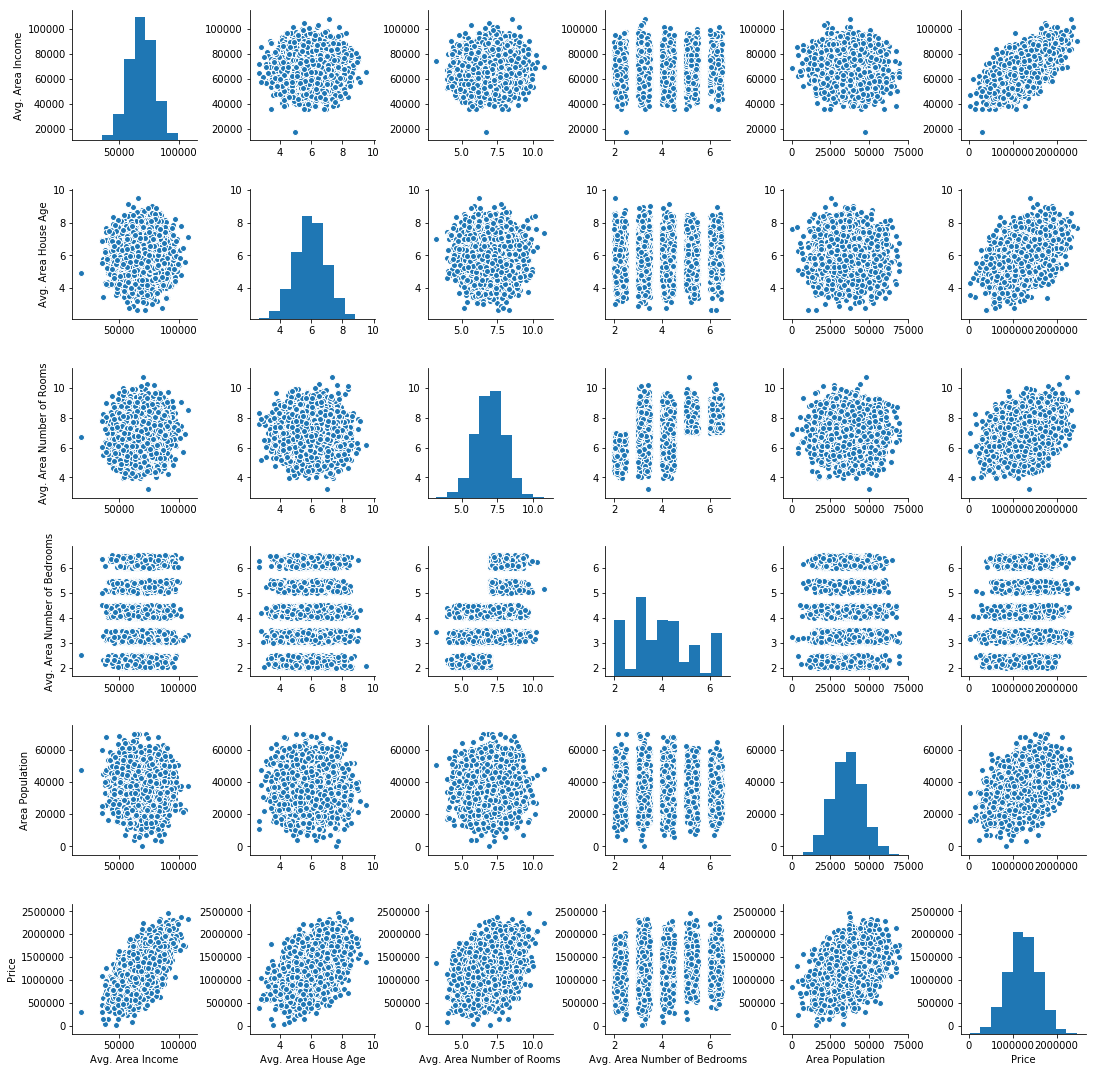

In [8]:
sns.pairplot(df)

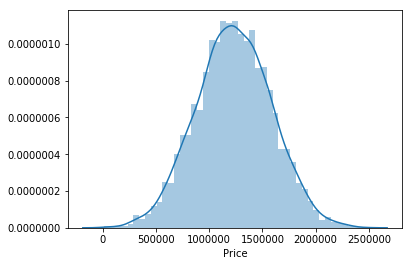

In [9]:
sns.distplot(df['Price'])

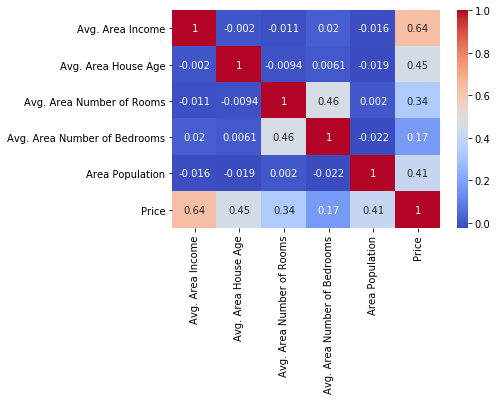

In [10]:
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

In [11]:
# Trick: copy column names
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [12]:
# We take all the cols except the Price, because that's what we'd like to predict
# and the address
X=df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]

In [13]:
y=df['Price']

In [14]:
# Train and test splits
from sklearn.model_selection import train_test_split

In [15]:
# Create splits
# Tip: Shift+TAB and get call from the docstring
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
# Load linear regression model
from sklearn.linear_model import LinearRegression

In [17]:
# Instantiate linear regression model
lm = LinearRegression()

In [18]:
# lm.TAB -> we see all available calls
# Train model = fit
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
# Get the intercept
lm.intercept_

-2638673.4261905821

In [49]:
# Get coefficients of each of the columns of X_train
# Each coeff means: if we increase a unit of the associated variable, the price increases the coeff value
lm.coef_

array([  2.16257989e+01,   1.65590393e+05,   1.19827783e+05,
         2.36109526e+03,   1.52165814e+01])

In [21]:
X_train.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population'],
      dtype='object')

In [22]:
# We can assemble a data frame with the result if we want
cdf = pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])

In [23]:
cdf

,Coeff
Avg. Area Income,21.625799
Avg. Area House Age,165590.392746
Avg. Area Number of Rooms,119827.783390
Avg. Area Number of Bedrooms,2361.095262
Area Population,15.216581


### Predict/Infer & Evaluation Metrics

In [29]:
# Predict
predictions = lm.predict(X_test)

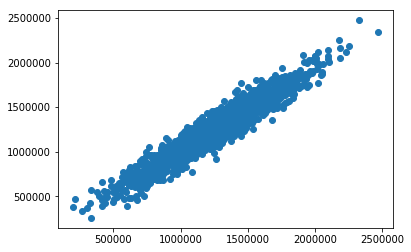

In [30]:
# Plot scatterplot true vs predicted
plt.scatter(x=y_test,y=predictions)

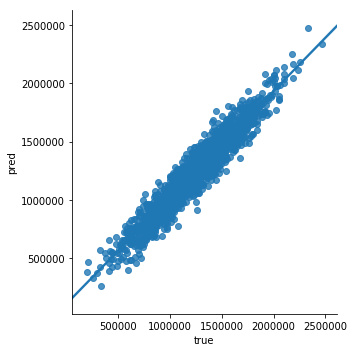

In [70]:
# Plot with seaborn lmplot
data=np.array([y_test,predictions]).T # reshape messes data up here
df = pd.DataFrame(data=data,columns=['true','pred'])
sns.lmplot(x='true',y='pred',data=df)

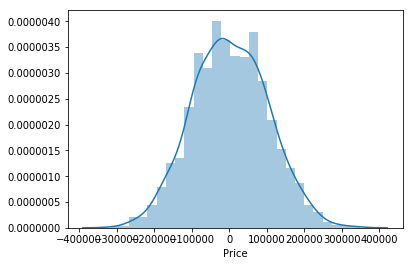

In [71]:
# Plot error/residuals distribution - it should be normal
sns.distplot((y_test-predictions))

(array([  1.,   0.,   1.,   3.,   2.,   5.,   3.,   5.,   8.,  16.,  15.,
         27.,  23.,  24.,  36.,  38.,  59.,  69.,  68.,  60.,  67.,  82.,
         79.,  69.,  70.,  65.,  75.,  63.,  78.,  53.,  57.,  65.,  37.,
         36.,  28.,  28.,  17.,  16.,  17.,  11.,   6.,   7.,   3.,   1.,
          3.,   1.,   1.,   1.,   0.,   1.]),
 array([-316529.76789841, -303245.33111329, -289960.89432817,
        -276676.45754304, -263392.02075792, -250107.5839728 ,
        -236823.14718768, -223538.71040255, -210254.27361743,
        -196969.83683231, -183685.40004719, -170400.96326207,
        -157116.52647694, -143832.08969182, -130547.6529067 ,
        -117263.21612158, -103978.77933646,  -90694.34255133,
         -77409.90576621,  -64125.46898109,  -50841.03219597,
         -37556.59541084,  -24272.15862572,  -10987.7218406 ,
           2296.71494452,   15581.15172964,   28865.58851477,
          42150.02529989,   55434.46208501,   68718.89887013,
          82003.33565526,   95287.7724

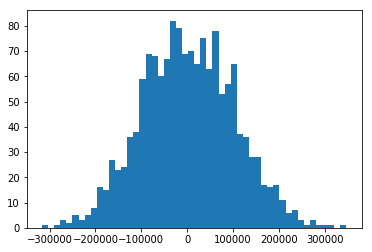

In [74]:
# Another option for plotting residual
plt.hist((y_test-predictions),bins=50)

In [50]:
# Error metrics
from sklearn import metrics

In [33]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 81135.5660934
MSE: 10068422551.4
RMSE: 100341.529545


In [72]:
# R^2: How much varience does our model explain?
metrics.explained_variance_score(y_test,predictions)

0.9147412103528012

### Boston dataset

This dataset is similar to the one we tested, but the Boston one is real.

In [25]:
from sklearn.datasets import load_boston

In [26]:
boston = load_boston()

In [27]:
type(boston)

sklearn.utils.Bunch

In [39]:
# boston is a dictionary
# we can get the keys
# and check their values as always with dicts: boston['key']
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [40]:
# Description text
print(boston['DESCR'])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [44]:
# Grab the data
X = boston.data
y = boston.target
cols = boston.feature_names

In [45]:
X.shape

(506, 13)

In [47]:
y.shape

(506,)

In [48]:
cols

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'],
      dtype='<U7')